In [73]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

%matploblib inline

UsageError: Line magic function `%matploblib` not found.


# Physical community resources

Included in this data are physical structures like parks & rec, libraries, community centers, schools, etc. that are funded in part or completely by the city of Philadelphia.

In [3]:
housing_counsel = gpd.read_file('../data/adult_resources/HousingCounselingAgencies.geojson')
hospitals = gpd.read_file('../data/city_buildings/Hospitals.geojson')
flu_clinics = gpd.read_file('../data/community_centers/Flu_shot.geojson')
HIV_clinics = gpd.read_file('../data/community_centers/RW_HIV_Treatment_Centers.geojson')
Healthy_Start = gpd.read_file('../data/community_centers/Healthy_Start_CRCs.geojson')
PPR_structures = gpd.read_file('../data/community_centers/PPR_Buildings_Structures.geojson')
schools = gpd.read_file('../data/schools/Schools.geojson')

In [57]:
List = []

housing_counsel['Resource'] = "Housing Counseling"
List.append(housing_counsel[['Resource','geometry']])

hospitals['Resource'] = "Hospital"
List.append(hospitals[['Resource','geometry']])

flu_clinics['Resource'] = 'Flu Clinic'
List.append(flu_clinics[['Resource','geometry']])

HIV_clinics['Resource'] = "HIV Clinic"
HIV_clinics = HIV_clinics.groupby('ADDRESS').first()
List.append(HIV_clinics[['Resource','geometry']])

Healthy_Start['Resource'] = "Healthy Start"
List.append(Healthy_Start[['Resource','geometry']])

PPR_structures['Resource'] = "Park and Rec Structure"
PPR_structures = PPR_structures.groupby('ALIAS_ADDRESS').first()
PPR_structures['geometry'] = PPR_structures['geometry'].centroid
List.append(PPR_structures[['Resource','geometry']])

schools['Resource'] = "School"
schools = schools.groupby('STREET_ADDRESS').first()
schools = schools.loc[schools.TYPE_SPECIFIC == "DISTRICT"]
List.append(schools[['Resource','geometry']])



In [58]:
structures = pd.concat(List).reset_index()

In [65]:
for i,j in color_map.items():
    color_patches.append(mpatches.Path(color=j,label=i))

Housing Counseling red
Hospital blue
Flu Clinic pink
HIV Clinic yellow
Healthy Start green
Park and Rec Structure orange
School purple


In [69]:
mpatches.Patch(facecolor='red')

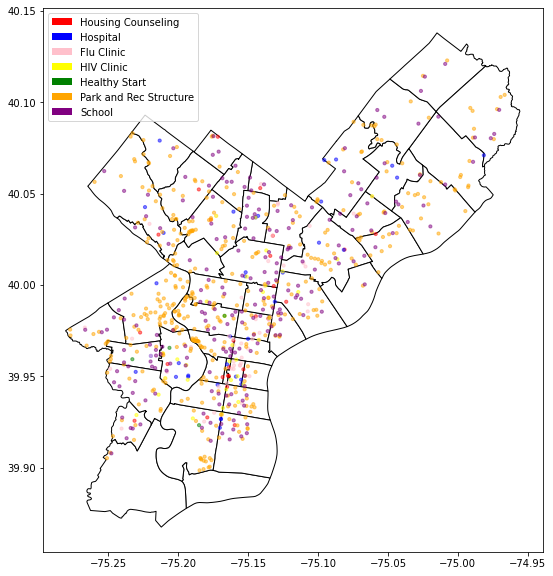

In [74]:
import matplotlib.patches as mpatches

PhillyMap = gpd.read_file('../data/base_geodata/Zipcodes_Poly.geojson')

color_map = {"Housing Counseling":"red","Hospital":"blue","Flu Clinic":"pink",
            "HIV Clinic":"yellow","Healthy Start":"green","Park and Rec Structure":"orange","School":"purple"}

base = PhillyMap.plot(color='white', edgecolor='black', figsize=(10,10))
structures.plot(ax=base, markersize=10,color=structures.Resource.map(color_map),alpha=0.5,legend=True)

color_patches = []

for i,j in color_map.items():
    color_patches.append(mpatches.Patch(facecolor=j,label=i))
    
plt.legend(handles=color_patches)

In [81]:
sjoined = gpd.sjoin(structures,PhillyMap,op='within')
PhillyMap['structure_count'] = sjoined.groupby('OBJECTID').size()
PhillyMap['structure_count'] = PhillyMap['structure_count'].fillna(0)

In [83]:
max(PhillyMap['structure_count'])

53.0

Text(0.5, 1.0, 'Physical Community Structures In Philly Zip Code')

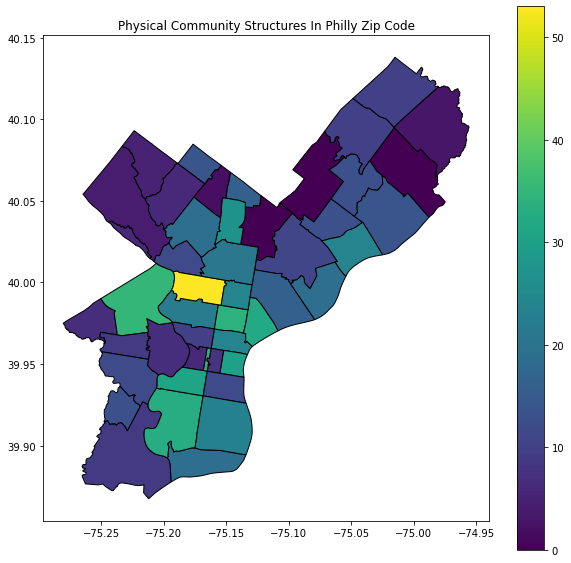

In [88]:

norm = matplotlib.colors.Normalize(vmin=0, vmax=max(PhillyMap['structure_count']), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.summer)
colors = PhillyMap.structure_count.fillna(0).apply(mapper.to_rgba)
PhillyMap.plot(column="structure_count",edgecolor='black',figsize=(10,10),legend=True)
plt.title("Physical Community Structures In Philly Zip Code")

/Users/jake/anaconda/envs/Amistad_env/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 1.724275869600789] is not finite

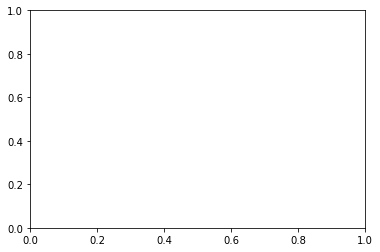